# Perkenalan:<br>
**Nama**<br>
Affan Anitya sebagai *Data Scientist 1*,<br>
Aqsal Herdi sebagai *Data Scientist 2*,<br>
Lia Kurniawati sebagai *Data Analyst*,<br>
Yuana Inka sebagai *Data Engineer*<br>
<br>
**Batch:** FTDS HCK-024

**Penulis Notebook:** Aqsal Herdi

In [ ]:
import os
import numpy as np
import pandas as pd

#import Visual
import tensorflow as tf
import matplotlib.pyplot as plt

#import Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import tensorflow, Model
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping


#import hyperparameter keras tunner (pilihan bisa di pakai bisa tidak)
import kerastuner as kt

#load model inferance
from PIL import Image
import requests
from io import BytesIO

/var/folders/4y/zyjycsf12qbfgp4fgvcx74yc0000gn/T/ipykernel_14824/3580381774.py:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
print(tf.__version__)

2.18.0


# Data Loading

In [3]:
# Define hyperparameters

train_path = '/Users/aqsal/Downloads/FINALPROJECT/finpro-fraud/p2-final-project-signature-detector/dataset/dataset2/processed_train'
test_path = '/Users/aqsal/Downloads/FINALPROJECT/finpro-fraud/p2-final-project-signature-detector/dataset/dataset2/processed_test'

# Modeling 

## Preprocessing

In [4]:
img_height = 224 #untuk ukuran gambar
img_width = 224 #untuk ukuran gambar
batch_size = 16 # jumlah sampel yang diproses oleh model dalam satu iterasi sebelum melakukan pembaruan bobo6

In [5]:
# Create batch generator for train-set, val-set, and test-set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   validation_split=0.4)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
																							class_mode='sparse',
																							subset='training',
																							batch_size=batch_size,
																							shuffle=True,
																							seed=10)

val_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(img_height,img_width),
																						class_mode='sparse',
																						subset='validation',
																						batch_size=batch_size,
																						shuffle=True,
																						seed=10)

test_datagen = ImageDataGenerator(rescale=1./255.)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
																						batch_size=batch_size,
																						shuffle=False,
																						seed=10)

Found 408 images belonging to 34 classes.
Found 272 images belonging to 34 classes.
Found 335 images belonging to 34 classes.


In [6]:
# Show labels

print(train_set.class_indices)
print(test_set.class_indices)

{'Ainun Putri': 0, 'Andi ahmad afiq': 1, 'Andi. Dwi Yuniarti. H': 2, 'Bayu Adi': 3, 'Dewi Titania Randa': 4, 'Dinda unidayan': 5, 'Dwi Octavia': 6, 'Fadli': 7, 'Fildzah Khalishah': 8, 'Fiqram Faathir': 9, 'Githa': 10, 'Hashimatul Zaria': 11, 'Ikbal': 12, 'Ishaq usn': 13, 'Khairunnisa': 14, 'Laode Sandi Yunus': 15, 'Lithania': 16, 'Mariati unidayan': 17, 'Mas Bilal': 18, 'Muh Luthfi': 19, 'Muh. Falah Mubaraq': 20, 'Muhammad Azriel Saktiawan': 21, 'Mursawal': 22, 'Ni Luh Ica Ardini': 23, 'Ni Made Sri Ulandari': 24, 'Nur Ilmi Fadilah': 25, 'Prety Maharani Utami': 26, 'Putri Angraini Aziz': 27, 'Putu Riva': 28, 'San': 29, 'Ulfa': 30, 'Vhivi': 31, 'Yulinda': 32, 'Zakiah': 33}
{'Ainun Putri': 0, 'Andi ahmad afiq': 1, 'Andi. Dwi Yuniarti. H': 2, 'Bayu Adi': 3, 'Dewi Titania Randa': 4, 'Dinda unidayan': 5, 'Dwi Octavia': 6, 'Fadli': 7, 'Fildzah Khalishah': 8, 'Fiqram Faathir': 9, 'Githa': 10, 'Hashimatul Zaria': 11, 'Ikbal': 12, 'Ishaq usn': 13, 'Khairunnisa': 14, 'Laode Sandi Yunus': 15, 'Lit

# Model Definition

In [7]:
# Update the number of classes to match your dataset
num_classes = len(train_set.class_indices)

# Create Sequential API model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/Users/aqsal/miniforge3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 34)             │        17,442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,738 (690.38 KB)

 Trainable params: 176,738 (690.38 KB)

 Non-trainable params: 0 (0.00 B)

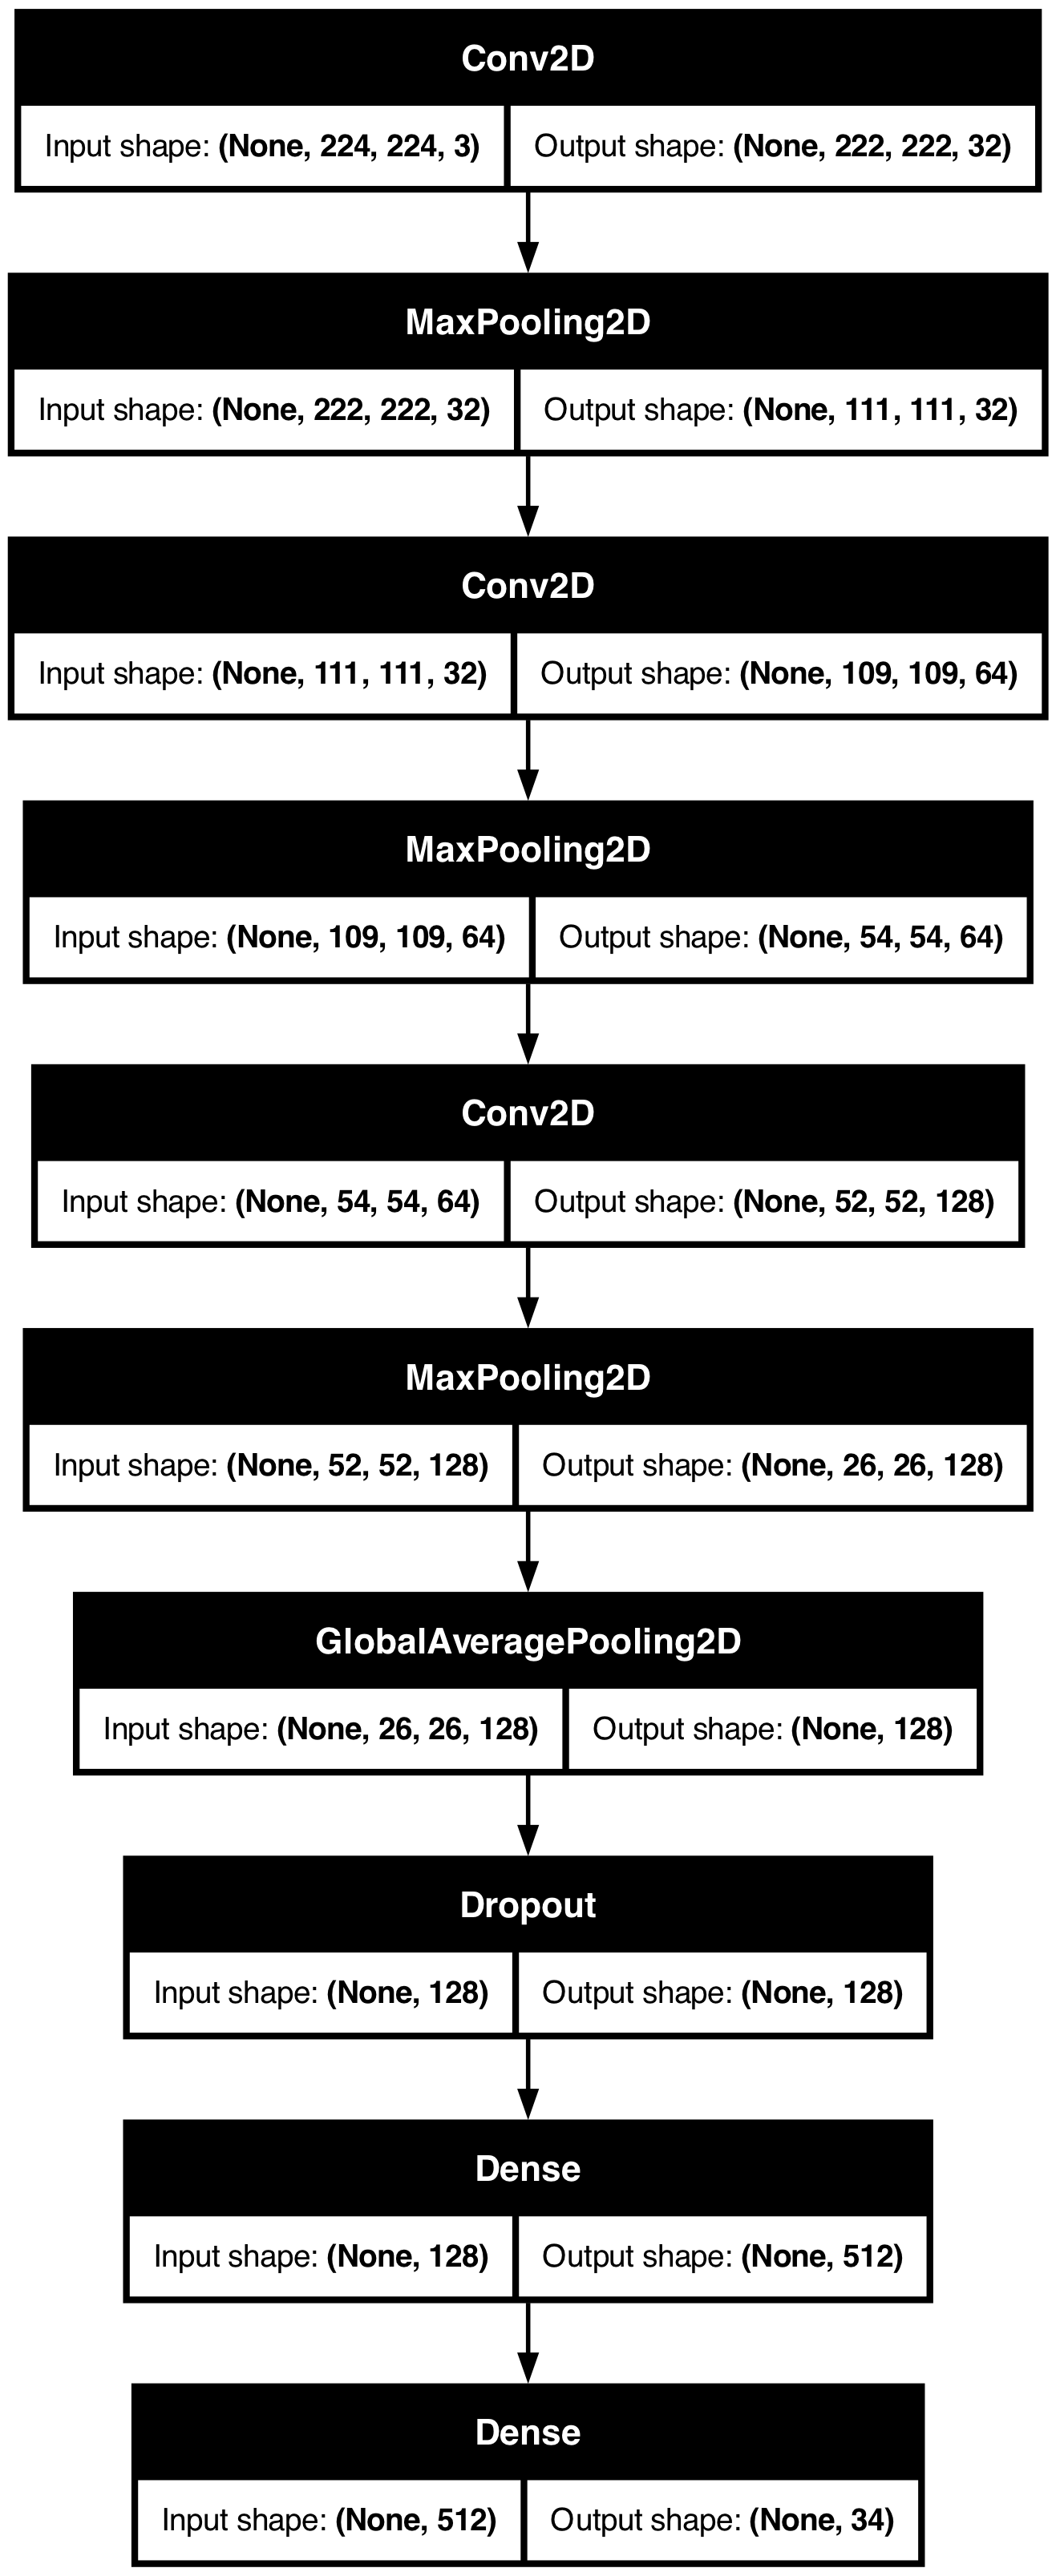

In [8]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

# Model Training

In [9]:
print("Train set samples:", train_set.samples)
print("Validation set samples:", val_set.samples)
print("Test set samples:", test_set.samples)

Train set samples: 408
Validation set samples: 272
Test set samples: 335


In [10]:
num_classes = len(train_set.class_indices)
print("Number of classes:", num_classes)

Number of classes: 34


In [11]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epoch = 250

# Train the model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=epoch,
    callbacks=[early_stopping]
)

/Users/aqsal/miniforge3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 0.0166 - loss: 3.5461 - val_accuracy: 0.0294 - val_loss: 3.5259
Epoch 2/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.0408 - loss: 3.5268 - val_accuracy: 0.0294 - val_loss: 3.5241
Epoch 3/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.0251 - loss: 3.5227 - val_accuracy: 0.0294 - val_loss: 3.5042
Epoch 4/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.0476 - loss: 3.5019 - val_accuracy: 0.0588 - val_loss: 3.4405
Epoch 5/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.0467 - loss: 3.4652 - val_accuracy: 0.0588 - val_loss: 3.4302
Epoch 6/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.0505 - loss: 3.4504 - val_accuracy: 0.0588 - val_loss: 3.3875
Epoch 7/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.0325 - loss: 3.4125 - val_accuracy: 0.0588 - val_loss: 3.3667
Epoch 8/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.0476 - loss: 3.3947 - val_ac

# Model Evaluation

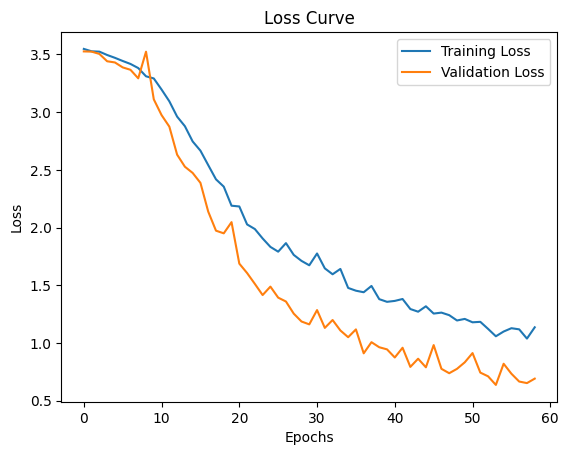

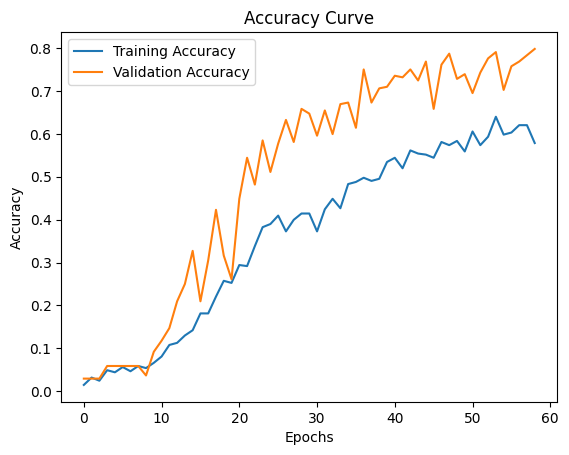

In [12]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Model Inferance 

In [22]:
print(train_set.class_indices)
print(test_set.class_indices)

{'Ainun Putri': 0, 'Andi ahmad afiq': 1, 'Andi. Dwi Yuniarti. H': 2, 'Bayu Adi': 3, 'Dewi Titania Randa': 4, 'Dinda unidayan': 5, 'Dwi Octavia': 6, 'Fadli': 7, 'Fildzah Khalishah': 8, 'Fiqram Faathir': 9, 'Githa': 10, 'Hashimatul Zaria': 11, 'Ikbal': 12, 'Ishaq usn': 13, 'Khairunnisa': 14, 'Laode Sandi Yunus': 15, 'Lithania': 16, 'Mariati unidayan': 17, 'Mas Bilal': 18, 'Muh Luthfi': 19, 'Muh. Falah Mubaraq': 20, 'Muhammad Azriel Saktiawan': 21, 'Mursawal': 22, 'Ni Luh Ica Ardini': 23, 'Ni Made Sri Ulandari': 24, 'Nur Ilmi Fadilah': 25, 'Prety Maharani Utami': 26, 'Putri Angraini Aziz': 27, 'Putu Riva': 28, 'San': 29, 'Ulfa': 30, 'Vhivi': 31, 'Yulinda': 32, 'Zakiah': 33}
{'Ainun Putri': 0, 'Andi ahmad afiq': 1, 'Andi. Dwi Yuniarti. H': 2, 'Bayu Adi': 3, 'Dewi Titania Randa': 4, 'Dinda unidayan': 5, 'Dwi Octavia': 6, 'Fadli': 7, 'Fildzah Khalishah': 8, 'Fiqram Faathir': 9, 'Githa': 10, 'Hashimatul Zaria': 11, 'Ikbal': 12, 'Ishaq usn': 13, 'Khairunnisa': 14, 'Laode Sandi Yunus': 15, 'Lit

In [24]:
def predict_image_path(image_path):
    try:
        img = Image.open(image_path).convert('RGB')  # Convert image to RGB
        img = img.resize((img_height, img_width))  # Resize the image to match the model's input size
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction[0])
        confidence = prediction[0][predicted_class] * 100

        predicted_label = class_names[predicted_class]

        return f"Predicted class: {predicted_label}, Confidence: {confidence:.2f}%"

    except Exception as e:
        return f"Error during prediction: {e}"

In [25]:
# Use the local file path
image_path = "/Users/aqsal/Downloads/FINALPROJECT/finpro-fraud/p2-final-project-signature-detector/dataset/dataset2/processed_test/Mas Bilal/aug_0_Mas_1.png"
result = predict_image_path(image_path)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


"Error during prediction: name 'class_names' is not defined"

# Tranfer Learning 

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pretrained MobileNetV2 tanpa fully connected layer terakhir
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights="imagenet")

# Freeze layer pretrained
base_model.trainable = False

# Tambahkan layer baru
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_set.class_indices), activation='softmax')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan training jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=50,  # Mulai dengan 50 epoch, bisa dihentikan lebih awal dengan EarlyStopping
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.0418 - loss: 4.1218 - val_accuracy: 0.0735 - val_loss: 3.3574
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.0577 - loss: 3.4683 - val_accuracy: 0.2279 - val_loss: 3.0001
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.1090 - loss: 3.0925 - val_accuracy: 0.4449 - val_loss: 2.6938
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.2444 - loss: 2.8120 - val_accuracy: 0.6360 - val_loss: 2.4089
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.2698 - loss: 2.6375 - val_accuracy: 0.7537 - val_loss: 2.1469
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.4470 - loss: 2.2846 - val_accuracy: 0.8051 - val_loss: 1.8932
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.4355 - loss: 2.0994 - val_accuracy: 0.8493 - val_loss: 1.6674
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.5015 - loss: 1.9286 - val_accuracy: 0.

# Evaluasi Model 

In [18]:
test_loss, test_acc = model.evaluate(test_set)
print(f"📊 Test Accuracy: {test_acc * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.7844 - loss: 0.9262
📊 Test Accuracy: 63.88%


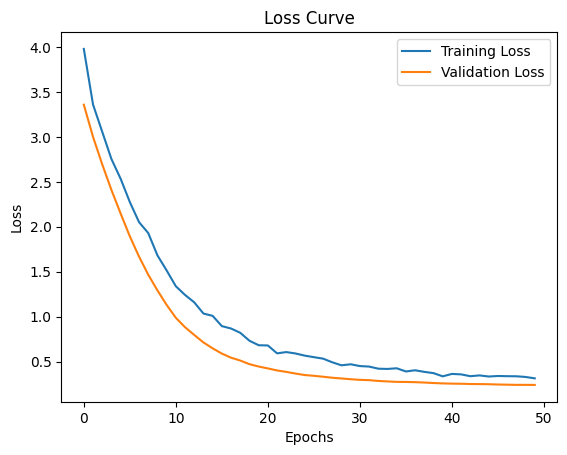

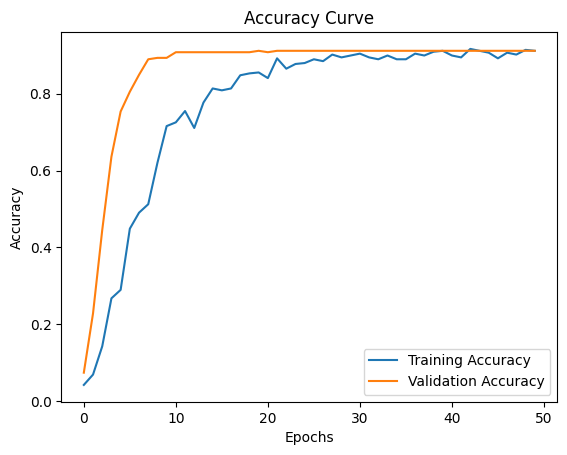

In [19]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()